### **Simple Imputer**: (Mean & Median)
- use mean when your data distribution in normal
- use median when there is skewness in your data distribution

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../../Database/messy_titanic_data.csv')

data['Original Age'] = data['Age'].copy()
data['Original Fare'] = data['Fare'].copy()
data = data[['Age', 'Fare', 'Family', 'Original Age', 'Original Fare', 'Survived']]
data.head()

,Age,Fare,Family,Original Age,Original Fare,Survived
0,22.0,7.2500,1,22.0,7.2500,0
1,38.0,71.2833,1,38.0,71.2833,1
2,26.0,7.9250,0,26.0,7.9250,1
3,35.0,53.1000,1,35.0,53.1000,1
4,35.0,8.0500,0,35.0,8.0500,0


In [3]:
from sklearn.model_selection import train_test_split

x = data.iloc[:, 0:5]
y = data.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

x_train.shape, x_test.shape

((712, 5), (179, 5))

In [4]:
x_train.isnull().mean()*100

Age              20.786517
Fare              5.056180
Family            0.000000
Original Age     20.786517
Original Fare     5.056180
dtype: float64

In [5]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

imp1 = SimpleImputer(strategy='mean')
imp2 = SimpleImputer(strategy='median')

imputer = ColumnTransformer(
    remainder='passthrough',
    transformers = [
        ('imputer 1', imp1, ['Age']),
        ('imputer 2', imp2, ['Fare']),
    ]
)

imputer.fit(x_train)

x_train = imputer.transform(x_train)
x_test  = imputer.transform(x_test)

In [6]:
test = pd.DataFrame(x_train)
print(test.isnull().mean()*100)

0     0.000000
1     0.000000
2     0.000000
3    20.786517
4     5.056180
dtype: float64


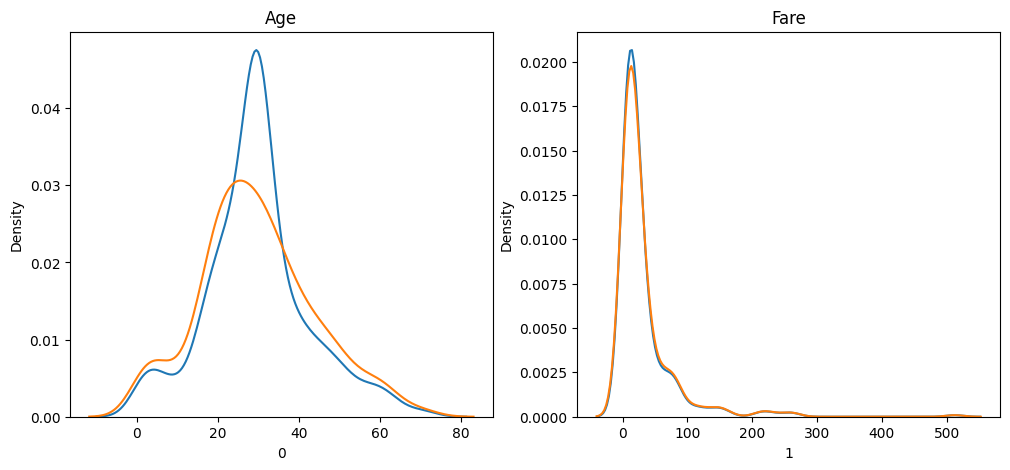

In [11]:
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title('Age')
sns.kdeplot(test[0], ax=ax1)
sns.kdeplot(test[3], ax=ax1)

ax2.set_title('Fare')
sns.kdeplot(test[1], ax=ax2)
sns.kdeplot(test[4], ax=ax2)

plt.show()

### End Of Distribution